In [92]:
#import ipympl
import matplotlib.pyplot as plt

import scipy as sp
import scipy.io
import numpy as np
import os
os.sys.path.append('../behavior')
from behavior_analysis import process_data as pd
from behavior_analysis import loadmat_sbx

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas 



%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
CaDataDir = "Z://2P_data/2AFC_V3/4058541.1/CA1/"
CaFile = "CA1_004_002"
info = loadmat_sbx(CaDataDir + "/rawDat/" + CaFile + ".mat")['info']

mouse = "4058541.1"
vr_dir = "Z://VR/2AFC_V3/"
sess = "2AFC_Test_PostSurg_4_imaging_"
c = pd(mouse,sess,basedir='work')

(178,)
(177, 4)


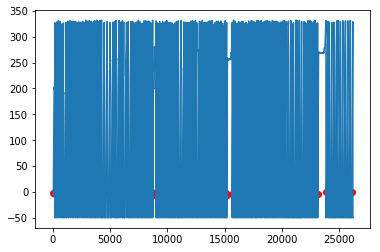

In [94]:
behavior,tstart_inds,reward_inds,first_lick_inds = c.align_to_ca(sess,info)
f,ax = plt.subplots()
ax.plot(behavior['position'])
ax.scatter(tstart_inds,behavior['position'][tstart_inds],c='red')
plt.show()
# behavior_dict = behavior.to_dict()
# print(behavior_dict.keys())
# sp.io.savemat("CA1_005_001_behavior.mat",behavior_dict)

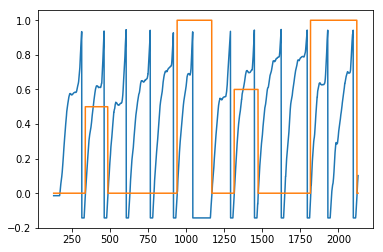

In [95]:
plt.plot(behavior['ca_inds'].values[0:2000],
         behavior['position'].values[0:2000]/350,
         behavior['ca_inds'].values[0:2000],
         behavior['morph'][0:2000].values)
plt.show()

In [97]:
import h5py
ca_dat = {}
print(CaDataDir+ CaFile+"_cnmf_results.mat")

try:
    with h5py.File(CaDataDir+ CaFile+"_cnmf_results.mat",'r') as f:
        for k,v in f.items():       
            try:
                ca_dat[k] = np.array(v)
            except:
                print(key)
                ca_dat[k]=v
                
except:    
    ca_dat = sp.io.loadmat(CaDataDir+ CaFile+"_cnmf_results.mat")
    for key in ca_dat.keys():
        if isinstance(ca_dat[key],np.ndarray):
            ca_dat[key] = ca_dat[key].T

Z://2P_data/2AFC_V3/4058541.1/CA1/CA1_004_002_cnmf_results.mat
__function_workspace__


In [98]:
print(ca_dat.keys())
print(ca_dat['C_dec'].shape)
print(behavior['morph'].shape)
#print(behavior['ca_'])

dict_keys(['#refs#', '#subsystem#', 'A_keep', 'C_dec', 'C_keep', 'Cn', 'F0', 'F_dff', 'P', 'RESULTS', 'R_keep', 'S_dec', 'b', 'bl', 'f', 'options'])
(26356, 888)
(26224,)


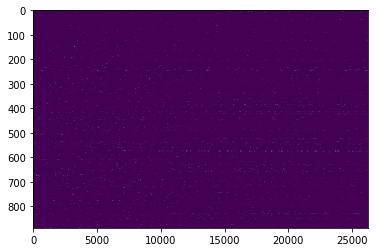

In [99]:
f,ax = plt.subplots()
f.figsize = (30, 30)

plt.imshow(ca_dat['C_dec'][behavior['ca_inds'].values,:].T,aspect='auto')
#plt.show()

# PCA using whole scan to do PCA

In [100]:
pca = PCA()
C_dec = sp.stats.zscore(ca_dat['C_dec'][behavior['ca_inds'].values,:],axis=0)
C_pca = pca.fit_transform(C_dec)

In [101]:
print(C_pca.shape)

(26224, 888)


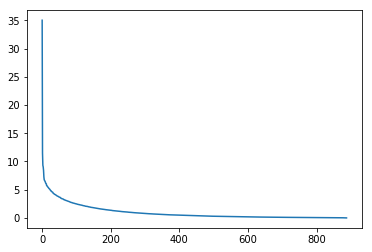

In [102]:
plt.plot(pca.explained_variance_)
plt.show()

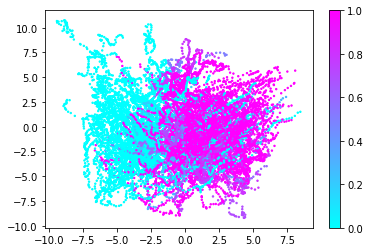

In [104]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111,projection='3d')
trialMask = behavior['position'].values>0
#ax.scatter(C_pca[trialMask,1],C_pca[trialMask,2],C_pca[trialMask,3],c=behavior['morph'].values[trialMask],cmap='cool',s=2)
context_trialMask = (behavior['position'].values>0) & (behavior['morph'].values!=0) &(behavior['morph'].values!=1)
f,ax = plt.subplots()
s=ax.scatter(C_pca[trialMask,1],C_pca[trialMask,2],c=behavior['morph'].values[trialMask],cmap='cool',s=2)
plt.colorbar(s,ax=ax)
#f.show()

Text(0,0.5,'PC2')

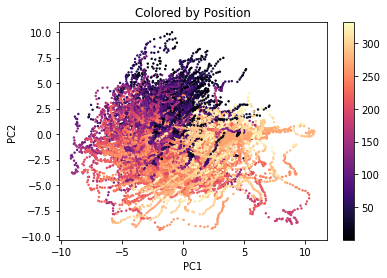

In [106]:
#plt.close('all')
f,ax = plt.subplots()
s =ax.scatter(C_pca[trialMask,2],C_pca[trialMask,3],c=behavior['position'].values[trialMask],cmap='magma',s=2)
plt.colorbar(s,ax =ax)
ax.set_title('Colored by Position')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#f.show()

Text(0,0.5,'P3')

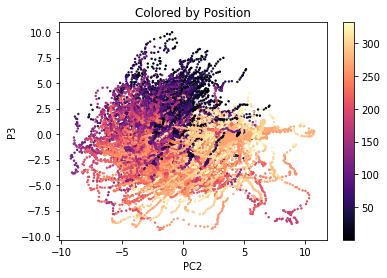

In [107]:
f,ax = plt.subplots()
s =ax.scatter(C_pca[trialMask,2],C_pca[trialMask,3],c=behavior['position'].values[trialMask],cmap='magma',s=2)
plt.colorbar(s,ax =ax)
ax.set_title('Colored by Position')
ax.set_xlabel('PC2')
ax.set_ylabel('P3')
#f.show()

Text(0.5,1,'Colored by Speed')

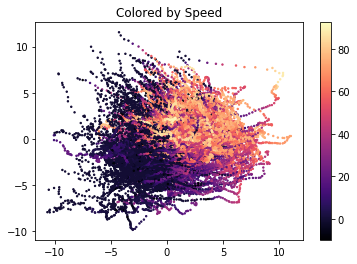

In [77]:
f,ax = plt.subplots()
speed = behavior['speed'].values
speed[speed<-10] = 0
s=ax.scatter(C_pca[trialMask,1],C_pca[trialMask,2],
            c=speed[trialMask],cmap='magma',s=2)
plt.colorbar(s,ax=ax)
ax.set_title('Colored by Speed')
#f.show()

# Restrict analysis to first half of track

In [108]:
pca = PCA()
print(C_dec.shape)
first_half_mask = np.where((behavior['position'].values<175) & (behavior['position'].values>0))
C_pca = pca.fit_transform(C_dec[first_half_mask[0],:])


(26224, 888)


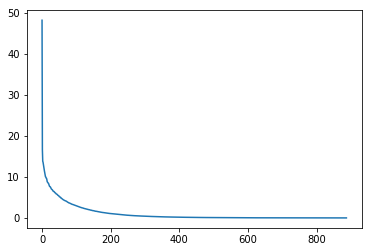

In [109]:
f,ax = plt.subplots()
ax.plot(pca.explained_variance_)
#f.show()

Text(0.5,1,'Colored by Context')

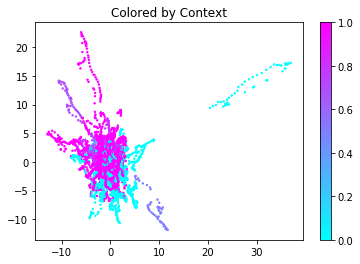

In [110]:
f, ax = plt.subplots()
s = ax.scatter(C_pca[:,2],C_pca[:,3],c=behavior['morph'].values[first_half_mask],cmap='cool',s=2)
plt.colorbar(s,ax=ax)
ax.set_title('Colored by Context')
#f.show()

Text(0.5,1,'Colored by Position')

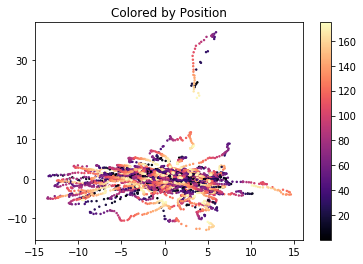

In [111]:
f,ax= plt.subplots()
s=ax.scatter(C_pca[:,1],C_pca[:,2],c=behavior['position'].values[first_half_mask],cmap='magma',s=2)
plt.colorbar(s,ax=ax)
ax.set_title('Colored by Position')
#f.show()

Text(0.5,1,'Colored by speed')

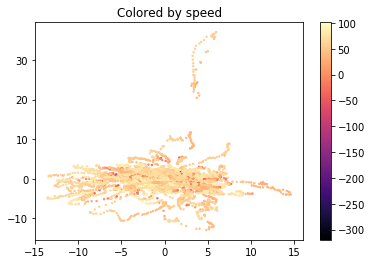

In [112]:
#f.close()
f,ax = plt.subplots()
s=ax.scatter(C_pca[:,1],C_pca[:,2],c=behavior['speed'].values[first_half_mask],cmap='magma',s=2)
plt.colorbar(s,ax=ax)
plt.title('Colored by speed')
#f.show()

# Second half of track

In [113]:
pca = PCA()
#C_dec = ca_dat['C_dec'][behavior['ca_inds'].values,:]
second_half_mask = np.where(behavior['position'].values>175)

C_pca = pca.fit_transform(C_dec[second_half_mask[0],:])


Text(0.5,1,'Colored by Context')

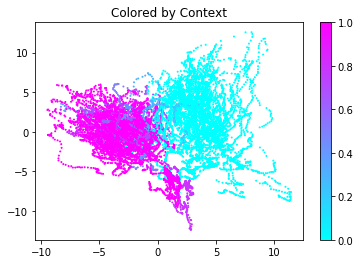

In [114]:

plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['morph'].values[second_half_mask],cmap='cool',s=1)
plt.colorbar()
plt.title('Colored by Context')

Text(0.5,1,'Colored by Position')

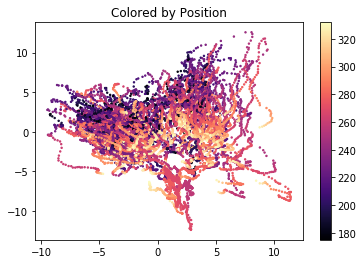

In [115]:

plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['position'].values[second_half_mask],cmap='magma',s=2)
plt.colorbar()
plt.title('Colored by Position')

Text(0.5,1,'Colored by Speed')

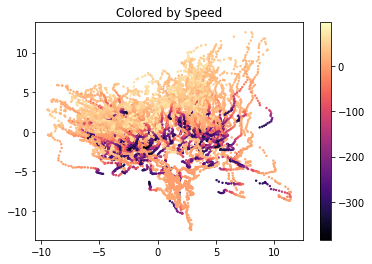

In [116]:
plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['speed'].values[second_half_mask],cmap='magma',s=2)
plt.colorbar()
plt.title('Colored by Speed')

# LDA

In [117]:
# perform dimensionality reduction leaving out morph trials
lda = LDA(n_components=1)
#plt.plot(behavior['rewards'])


# additionally restrict to timepoints before the reward
base_trial_mask = np.where(((behavior['morph'].values==1) | (behavior['morph'].values==0)) & 
                          ((behavior['rewards']==1) | (behavior['rewards']==-1) | 
                           (behavior['rewards']==2)|(behavior['rewards']==-2)))
                           
                           #& (behavior['position'].values>0)) # &
                          # ((behavior['rewards']==-1)|(behavior['rewards']==-2)))


trial_mask = np.where((behavior['position'].values>0) ) #& (behavior['position'].values<175))

C_base_lda = lda.fit_transform(C_dec[base_trial_mask[0],:],behavior['morph'].values[base_trial_mask[0]])


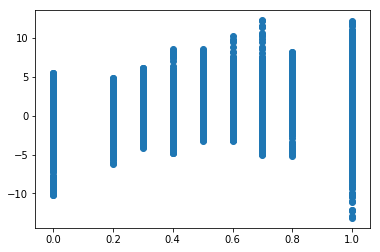

In [118]:
C_lda = lda.transform(C_dec)

#plt.scatter(behavior['morph'].values[base_trial_mask[0]],C_base_lda)
f,ax = plt.subplots()
ax.scatter(behavior['morph'].values[trial_mask[0]],C_lda[trial_mask[0]])

(26224, 2)


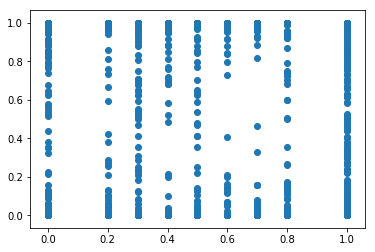

In [119]:
# plot probabilities instead of projection
C_ldaprob = lda.predict_proba(C_dec)
print(C_ldaprob.shape)
#print(C_ldaprob.sum(axis=1))
f,ax= plt.subplots()
plt.scatter(behavior['morph'].values[trial_mask[0]],C_ldaprob[trial_mask[0],0])


In [1]:
# plot maze start triggered projection/probability, mid point triggered, and reward triggered
f,ax = plt.subplots()
#print(len(tstart_inds))

for t in tstart_inds:
    if (behavior['morph'].values[t]!=1.0) and (behavior['morph'].values[t]!=0.0):
        ax.plot(C_lda[t-50:t+50],c=plt.cm.cool(behavior['morph'].values[t]))

NameError: name 'plt' is not defined

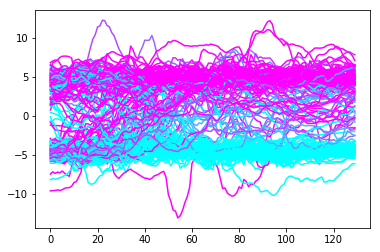

In [121]:
f,ax = plt.subplots()
#print(len(tstart_inds))

for t in reward_inds:
    #if (behavior['morph'].values[t]!=1.0) and (behavior['morph'].values[t]!=0.0):
        
        ax.plot(C_lda[t-80:t+50],c=plt.cm.cool(behavior['morph'].values[t]))

engram type analysis
average activity of cells in either context

average activity of cells in morph context

take inner product with the two averages

Look at transition probabilities between different states (binarize data)

How frequently are particular states observed ? are they ever observed more than once?
